In [10]:
import pandas as pd
import numpy as np
from IPython.display import clear_output
import ast

In [2]:
mv /Users/zswitten/Downloads/GSE92742_Broad_LINCS_sig_info.txt ../data/signature_gexp.txt

mv: /Users/zswitten/Downloads/GSE92742_Broad_LINCS_sig_info.txt: No such file or directory


In [41]:
inhibitiondf = pd.read_csv('../data/gexp_activity_test.csv')
inhibitiondf['pert_id'] = inhibitiondf.pert_id.apply(lambda x: ast.literal_eval(x))
inhibitiondf = inhibitiondf.explode('pert_id')

In [4]:
"""
[
    A: 0.5
    B, C: 0.7
]
A and B are perturbagens
When B and C are in the same row, they map to the 'same drug'

->

[
 A: 0.5
 B: 0.7
 C: 0.7
]

[
    A1: 0.5
    A2: 0.5
    ...
    AN: 0.5 where each Ai is a signature associated with A
]


Training:
[
    [g01, g02, ..., g012000]: 0.5
    [g11, g12, ..., g12000]: 0.7
]

Prediction:
    Map a drug to all its associated GEXPs, make predictions, then combine them
    Or combine the GEXPs, then make one prediction
"""
clear_output()

In [5]:
signaturedf = pd.read_csv('../data/signature_gexp.txt', sep='\t')

/Users/zswitten/coronavirus/env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
gexpdf = pd.read_csv('../data/level5_1000.csv')

In [67]:
# len(inhibitiondf)
inhibitiondf.head()

,pert_id,smiles,Inh_index
0,BRD-K54094468,CCN1CCCC1CNC(=O)c1c(OC)ccc(Br)c1OC,0.346536
1,BRD-K04111260,CCN1CCCC1CNC(=O)c1c(O)c(Cl)cc(Cl)c1OC,0.043675
2,BRD-A60197193,CCN1CCCC1CNC(=O)c1cc(S(=O)(=O)CC)c(N)cc1OC,0.094621
3,BRD-A55272860,CCN1CCCC1CNC(=O)c1cc(S(N)(=O)=O)ccc1OC,0.043702
3,BRD-K51671335,CCN1CCCC1CNC(=O)c1cc(S(N)(=O)=O)ccc1OC,0.043702


In [7]:
signaturedf.head()

,sig_id,pert_id,pert_iname,pert_type,cell_id,pert_dose,pert_dose_unit,pert_idose,pert_time,pert_time_unit,pert_itime,distil_id
0,AML001_CD34_24H:A05,DMSO,DMSO,ctl_vehicle,CD34,0.1,%,0.1 %,24,h,24 h,AML001_CD34_24H_X1_F1B10:A05
1,AML001_CD34_24H:A06,DMSO,DMSO,ctl_vehicle,CD34,0.1,%,0.1 %,24,h,24 h,AML001_CD34_24H_X3_F1B10:A06
2,AML001_CD34_24H:B05,DMSO,DMSO,ctl_vehicle,CD34,0.1,%,0.1 %,24,h,24 h,AML001_CD34_24H_X1_F1B10:B05|AML001_CD34_24H_X...
3,AML001_CD34_24H:B06,DMSO,DMSO,ctl_vehicle,CD34,0.1,%,0.1 %,24,h,24 h,AML001_CD34_24H_X3_F1B10:B06
4,AML001_CD34_24H:BRD-A03772856:0.37037,BRD-A03772856,BRD-A03772856,trt_cp,CD34,0.37037,µM,500 nM,24,h,24 h,AML001_CD34_24H_X1_F1B10:J04|AML001_CD34_24H_X...


In [8]:
gexpdf.head()

,rid,CPC005_A375_6H:BRD-A85280935-003-01-7:10,CPC005_A375_6H:BRD-A07824748-001-02-6:10,CPC004_A375_6H:BRD-K20482099-001-01-1:10,CPC005_A375_6H:BRD-K62929068-001-03-3:10,CPC005_A375_6H:BRD-K43405658-001-01-8:10,CPC004_A375_6H:BRD-K03670461-001-02-0:10,CPC004_A375_6H:BRD-K36737713-001-01-6:10,CPC005_A375_6H:BRD-K51223576-001-01-3:10,CPC004_A375_6H:BRD-A14966924-001-03-0:10,...,CPC005_A375_24H:BRD-A59303141-001-03-9:10,CPC005_A375_24H:BRD-K54665485-001-04-6:10,CPC005_A375_24H:BRD-A54236247-003-03-5:10,CPC005_A375_24H:BRD-K10098805-001-02-0:10,CPC005_A375_24H:BRD-K13725475-001-02-4:10,CPC005_A375_24H:BRD-A08003242-001-02-7:10,CPC005_A375_24H:BRD-K43796186-001-01-1:10,CPC005_A375_24H:BRD-K83063356-003-01-7:10,CPC005_A375_24H:BRD-K86600316-003-01-2:10,CPC005_A375_24H:BRD-A92585442-237-01-0:10
0,5720,0.773769,-0.645586,-5.449666,0.193408,1.006298,-5.388713,-1.000240,0.490110,0.063297,...,0.160586,-0.193009,0.247968,0.384757,0.352685,-0.233490,0.281433,1.141963,-0.302364,1.025050
1,466,-0.818468,-0.810749,2.393775,-0.582243,0.455536,1.867731,-1.106092,0.595174,-0.962553,...,0.161364,-0.244689,0.559568,0.592947,-1.140376,-2.413500,-1.134386,0.623217,-0.170404,0.265432
2,6009,0.189572,0.459060,1.279790,-0.178977,0.631738,0.281383,-0.422545,-0.224163,0.521552,...,-0.663482,-0.235831,0.684576,1.720635,-0.254450,-0.414349,-0.796767,0.418341,0.870858,-0.539486
3,2309,-0.146031,-0.224676,2.167868,-1.182025,-0.936414,1.378175,0.406279,-0.244783,0.182361,...,0.552385,0.218920,-0.601392,-0.404516,0.662811,1.789149,0.664427,1.452139,-0.774794,-0.752421
4,387,-0.654002,-0.335681,2.333199,-1.012651,-1.213203,1.290522,-0.218671,-0.124029,0.572183,...,-0.373290,1.054628,0.458266,0.077265,0.079647,-1.665797,-0.323780,0.285577,0.879944,0.504271


In [11]:
inhibitiondf['pert_id'] = inhibitiondf.pert_id.apply(lambda x: ast.literal_eval(x))

In [37]:
inhibitiondf.pert_id.apply(pd.Series)[3].apply(lambda x: x==x).sum()

2

In [39]:
len(inhibitiondf.explode('pert_id'))

320

In [49]:
df = signaturedf.merge(inhibitiondf, on='pert_id')[['sig_id', 'pert_id', 'Inh_index']]

In [57]:
df['gexp'] = df.sig_id.apply(lambda x: np.array(gexpdf[x]) if x in gexpdf else None)

In [87]:
df = df.dropna(subset=['gexp'])

In [88]:
x = np.array([z for z in df.gexp.values])

In [89]:
y = np.array(df.Inh_index)

In [90]:
x.shape, y.shape

((99, 12328), (99,))

In [100]:
import make_training_data
from importlib import reload
reload(make_training_data)

/Users/zswitten/coronavirus/env/lib/python3.7/site-packages/ipykernel_launcher.py:3: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  This is separate from the ipykernel package so we can avoid doing imports until


<module 'make_training_data' from '/Users/zswitten/coronavirus/make_training_data.py'>

In [97]:
make_training_data.test_x.shape, make_training_data.test_y.shape

((99, 12328), (99,))

In [98]:
make_training_data.valid_x.shape, make_training_data.valid_y.shape

((85, 12328), (85,))

In [99]:
make_training_data.train_x.shape, make_training_data.train_y.shape

((258, 12328), (258,))

In [154]:
import vae
reload(vae)

<module 'vae' from '/Users/zswitten/coronavirus/vae.py'>

=======> Epoch: 0 Average loss: 5925284.0498046875
=======> Epoch: 2 Average loss: 5870338.642578125
=======> Epoch: 4 Average loss: 5843002.6611328125
=======> Epoch: 6 Average loss: 5758320.052734375
=======> Epoch: 8 Average loss: 5754792.7392578125
=======> Epoch: 10 Average loss: 6054954.3466796875
=======> Epoch: 12 Average loss: 5751742.4970703125
=======> Epoch: 14 Average loss: 5594041.90625
=======> Epoch: 16 Average loss: 6581034.41796875
=======> Epoch: 18 Average loss: 5784892.783203125


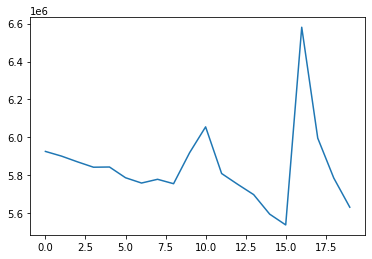

In [155]:
model = vae.train_vae(epochs=20, model=model)

=======> Epoch: 0 Average loss: 10004485.369140625
=======> Epoch: 2 Average loss: 7751909.33984375
=======> Epoch: 4 Average loss: 7229608.3955078125
=======> Epoch: 6 Average loss: 6844007.1103515625
=======> Epoch: 8 Average loss: 6558259.3310546875
=======> Epoch: 10 Average loss: 6520358.1572265625
=======> Epoch: 12 Average loss: 6335655.52734375
=======> Epoch: 14 Average loss: 6201603.0439453125
=======> Epoch: 16 Average loss: 6145515.7265625
=======> Epoch: 18 Average loss: 6039415.646484375


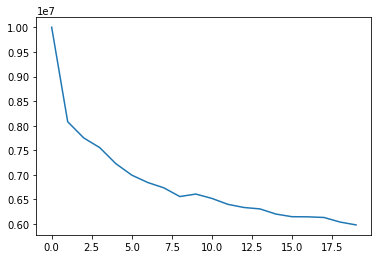

In [153]:
model = vae.train_vae(epochs=20)

=======> Epoch: 0 Average loss: 10004485.369140625
=======> Epoch: 2 Average loss: 7751909.33984375
=======> Epoch: 4 Average loss: 7229608.3955078125
=======> Epoch: 6 Average loss: 6844007.1103515625
=======> Epoch: 8 Average loss: 6558259.3310546875
=======> Epoch: 10 Average loss: 6520358.1572265625
=======> Epoch: 12 Average loss: 6335655.52734375
=======> Epoch: 14 Average loss: 6201603.0439453125
=======> Epoch: 16 Average loss: 6145515.7265625
=======> Epoch: 18 Average loss: 6039415.646484375


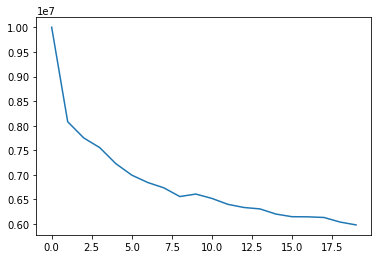

In [131]:
model = vae.train_vae(epochs=20)

In [134]:
dl = vae.make_data_loader(vae.DATA_FILE)

In [150]:
list(enumerate(dl))[3][1].shape

torch.Size([32, 12328])

In [151]:
lincs

NameError: name 'lincs' is not defined